In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

set1no = 900
set2no = 100

In [7]:
df1 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0, scale=1, size=set1no),
    "feature_2": np.random.normal(loc=0, scale=1, size=set1no),
    "target" : [0] * set1no
})

df2 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0, scale=1, size=set2no),
    "feature_2": np.random.normal(loc=0, scale=1, size=set2no),
    "target" : [1] * set2no
})

In [8]:
df1

,feature_1,feature_2,target
0,-1.388543,-0.992866,0
1,-1.600271,-1.445205,0
2,-1.217283,0.666270,0
3,0.159463,0.577979,0
4,-0.892788,0.577364,0
...,...,...,...
895,-0.198196,-1.742772,0
896,0.510157,0.409439,0
897,1.272570,-0.276672,0
898,0.126314,0.113394,0


In [9]:
df2

,feature_1,feature_2,target
0,-0.188202,-0.025494,1
1,-0.103587,-0.217159,1
2,-0.213875,0.058370,1
3,0.970316,-0.603859,1
4,0.418760,-0.343206,1
...,...,...,...
95,0.523961,-0.106194,1
96,-0.399900,3.098299,1
97,-0.745168,-0.258175,1
98,-0.104968,0.510124,1


In [11]:
df = pd.concat([df1,df2]).reset_index(drop=True)

In [12]:
df

,feature_1,feature_2,target
0,-1.388543,-0.992866,0
1,-1.600271,-1.445205,0
2,-1.217283,0.666270,0
3,0.159463,0.577979,0
4,-0.892788,0.577364,0
...,...,...,...
995,0.523961,-0.106194,1
996,-0.399900,3.098299,1
997,-0.745168,-0.258175,1
998,-0.104968,0.510124,1


In [14]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [15]:
# upsampling -> upsample minority 
# az olanlari arttirmak

In [16]:
# downsampling -> downsample minority
# cok olanlari azaltmak

In [17]:
df_minority = df[df["target"] == 1]

In [18]:
df_minority

,feature_1,feature_2,target
900,-0.188202,-0.025494,1
901,-0.103587,-0.217159,1
902,-0.213875,0.058370,1
903,0.970316,-0.603859,1
904,0.418760,-0.343206,1
...,...,...,...
995,0.523961,-0.106194,1
996,-0.399900,3.098299,1
997,-0.745168,-0.258175,1
998,-0.104968,0.510124,1


In [19]:
df_majority = df[df["target"] == 0]

In [21]:
df_majority

,feature_1,feature_2,target
0,-1.388543,-0.992866,0
1,-1.600271,-1.445205,0
2,-1.217283,0.666270,0
3,0.159463,0.577979,0
4,-0.892788,0.577364,0
...,...,...,...
895,-0.198196,-1.742772,0
896,0.510157,0.409439,0
897,1.272570,-0.276672,0
898,0.126314,0.113394,0


In [22]:
from sklearn.utils import resample

In [24]:
df_minority_upsample = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42) 
# burada azinlikta olan degeri arttirdik. datalari tekrarlayarak yapiyor. 

In [25]:
df_minority_upsample

,feature_1,feature_2,target
951,0.082987,-1.233101,1
992,0.331648,0.297462,1
914,-0.510989,0.394580,1
971,0.046006,-0.164242,1
960,-0.054778,0.029431,1
...,...,...,...
952,-0.130926,1.390972,1
965,-1.436254,-0.318846,1
976,0.179622,0.452068,1
942,-2.833030,0.020417,1


In [34]:
df_upsampled = pd.concat([df_majority,df_minority_upsample], ignore_index=True)

In [35]:
df_upsampled

,feature_1,feature_2,target
0,-1.388543,-0.992866,0
1,-1.600271,-1.445205,0
2,-1.217283,0.666270,0
3,0.159463,0.577979,0
4,-0.892788,0.577364,0
...,...,...,...
1795,-0.130926,1.390972,1
1796,-1.436254,-0.318846,1
1797,0.179622,0.452068,1
1798,-2.833030,0.020417,1


In [39]:
df_majority_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)

In [40]:
df_majority_downsampled

,feature_1,feature_2,target
102,1.669070,-1.395449,0
435,-1.179460,0.050228,0
860,1.481961,-1.045529,0
270,0.572006,1.528748,0
106,1.325432,-0.739029,0
...,...,...,...
201,-0.031203,-1.017764,0
269,1.053986,1.452756,0
862,-0.565576,-0.624510,0
815,-0.309650,-1.518970,0


In [41]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority], ignore_index=True)

In [42]:
df_downsampled

,feature_1,feature_2,target
0,1.669070,-1.395449,0
1,-1.179460,0.050228,0
2,1.481961,-1.045529,0
3,0.572006,1.528748,0
4,1.325432,-0.739029,0
...,...,...,...
195,0.523961,-0.106194,1
196,-0.399900,3.098299,1
197,-0.745168,-0.258175,1
198,-0.104968,0.510124,1


In [43]:
# SMOTE (Synthetic Minority Over-Sampling Technique)

In [46]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [56]:
df

,feature_1,feature_2,target
0,-1.388543,-0.992866,0
1,-1.600271,-1.445205,0
2,-1.217283,0.666270,0
3,0.159463,0.577979,0
4,-0.892788,0.577364,0
...,...,...,...
995,0.523961,-0.106194,1
996,-0.399900,3.098299,1
997,-0.745168,-0.258175,1
998,-0.104968,0.510124,1


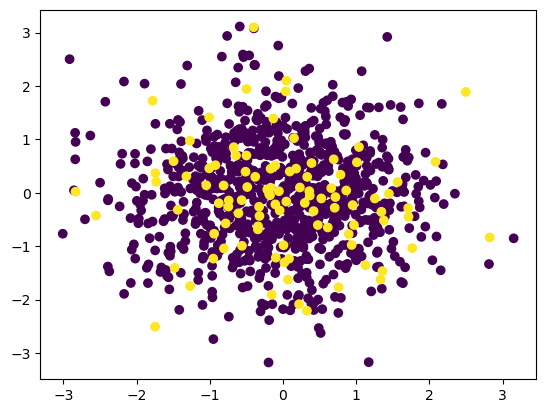

In [48]:
import matplotlib.pyplot as plt
plt.scatter(df["feature_1"], df["feature_2"], c=df["target"])

In [49]:
# !pip install imblearn

In [50]:
from imblearn.over_sampling import SMOTE

In [52]:
oversample= SMOTE() # obje olusturuyoruz.

In [53]:
(X, y) = oversample.fit_resample(df[["feature_1", "feature_2"]],df["target"])
# y = target olur, bu df deki degil olusturulacak olan örnekler olur.

In [54]:
X # bunlar eski featureler + olusan yeni featureler 

,feature_1,feature_2
0,-1.388543,-0.992866
1,-1.600271,-1.445205
2,-1.217283,0.666270
3,0.159463,0.577979
4,-0.892788,0.577364
...,...,...
1795,0.446263,-0.533342
1796,-0.527456,0.441626
1797,-0.673120,1.759928
1798,1.407313,-1.414927


In [55]:
y # buda eski targetler + olusan yeni target degerleri

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [61]:
oversample_df = pd.concat([X,y], axis=1) 
# yan yana ekleme yapiyor gibi bu yuzden ignore_index=True ile isin yok zaten ikisinde de ayni sayida row var

In [62]:
oversample_df

,feature_1,feature_2,target
0,-1.388543,-0.992866,0
1,-1.600271,-1.445205,0
2,-1.217283,0.666270,0
3,0.159463,0.577979,0
4,-0.892788,0.577364,0
...,...,...,...
1795,0.446263,-0.533342,1
1796,-0.527456,0.441626,1
1797,-0.673120,1.759928,1
1798,1.407313,-1.414927,1


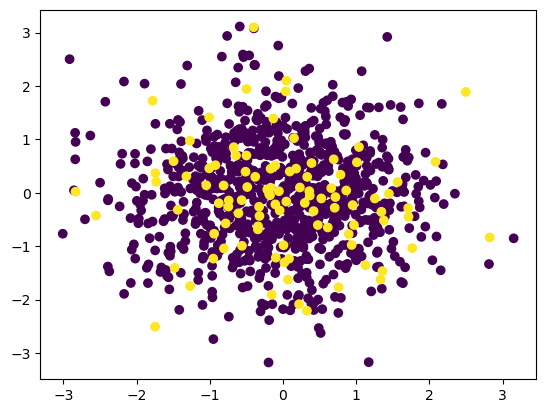

In [63]:
plt.scatter(df["feature_1"], df["feature_2"], c=df["target"])

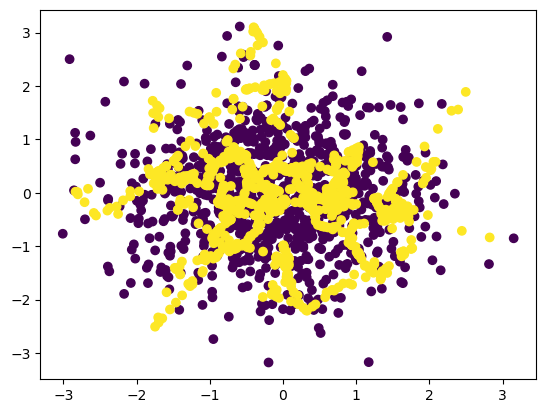

In [64]:
plt.scatter(oversample_df["feature_1"], oversample_df["feature_2"], c=oversample_df["target"])